<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULO 1 - SEMANA 4**

**Ejercicio 1. Sistema RLC**

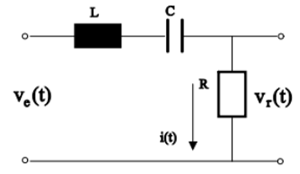

Fig. 1-1. Esquem√°tico del circuito RLC.

Sea el sistema el√©ctrico de la Fig. 1-1, se requiere obtener la evoluci√≥n temporal de la corriente para diferentes tensiones de entrada.
Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se obtuvo la soluci√≥n anal√≠tica como

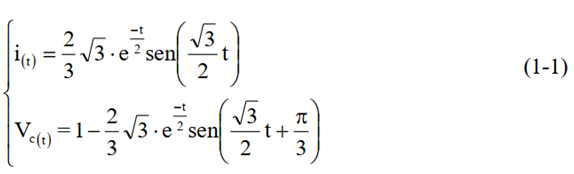


Expresi√≥n matricial

Para determinar la evoluci√≥n de la corriente del circuito se pueden plantear las ecuaciones diferenciales del mismo como,

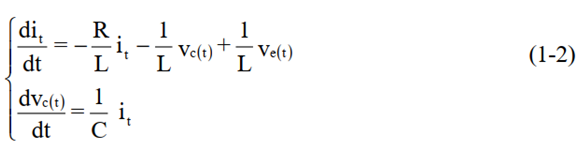

Las Ec. (1-2) se pueden expresar en una ecuaci√≥n matricial-vectorial con las representaciones en variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir x=[ i vc]T se convierte en

  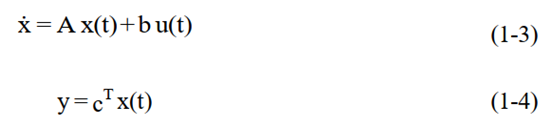

donde las matrices contienen a los coeficientes del circuito,

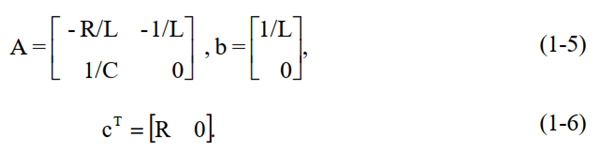

N√≥tese que las ecuaciones (1-1) son la soluci√≥n al sistema para coeficientes espec√≠ficos, en este caso, de valor unitario.



Actividades

1- Asignar valores a R=1 Ohm, L=1Hy, y C=1F.

a.	Empleando la soluci√≥n anal√≠tica, simular 3 segundos con una entrada de tensi√≥n escal√≥n de 12V.





b.	Empleando el c√°lculo mediante Euler, verificar que coincida con el √≠tem anterior.

Asignando los valores para R, L, C unitarios y Ve=12 V, aplicando el m√©todo de Euler al sistema en estudio y comparando con la solucion analitica resulta:

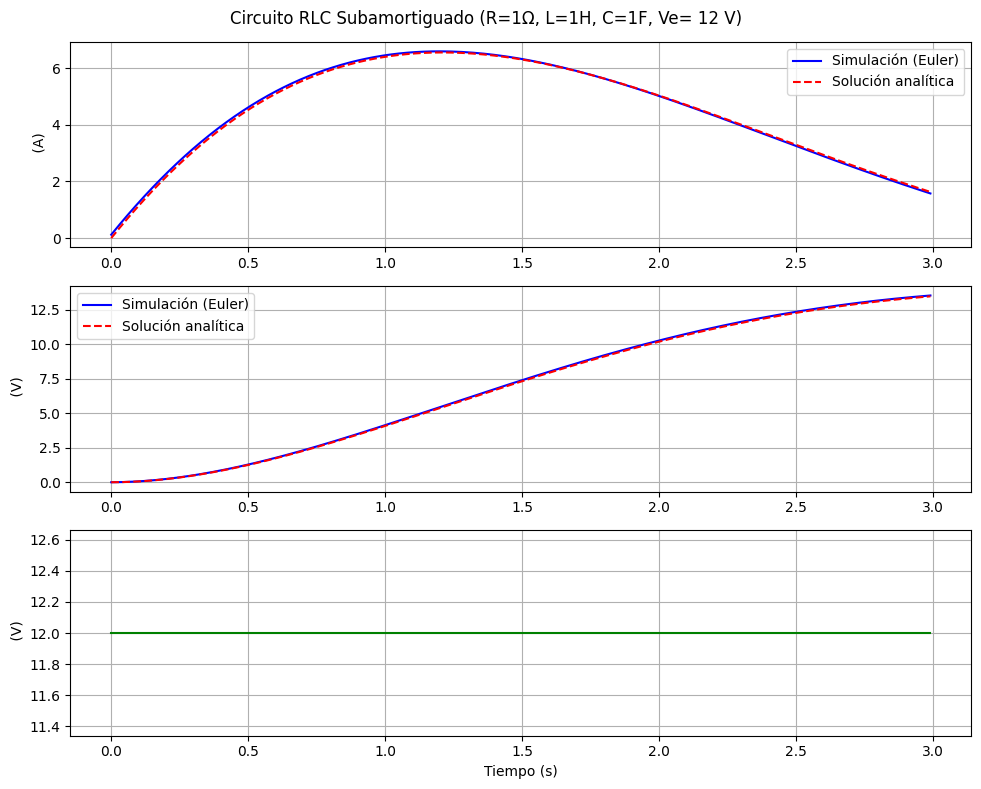

In [32]:
# @title
import numpy as np
from matplotlib import pyplot as plt

# Par√°metros del circuito
R = 1      # Ohm
L = 1      # H
C = 1      # F
h = 1e-2   # Paso de tiempo
t_simul = 3  # Tiempo de simulaci√≥n (3 segundos)

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicializaci√≥n
t = np.arange(0, t_simul, h)
x1 = np.zeros_like(t)  # Corriente i_L(t)
x2 = np.zeros_like(t)  # Voltaje V_C(t)
u = np.zeros_like(t)   # Entrada Va(t)

# Condiciones iniciales
x = np.array([[0], [0]])  # [i_L(0); V_C(0)]
Va = 12  # Escal√≥n de 12V

# Simulaci√≥n con Euler
for ii in range(len(t)):
    xp = np.matmul(A, x) + B * Va  # dx/dt = A*x + B*u
    x = x + xp * h  # M√©todo de Euler
    x1[ii] = x[0]   # Almacena corriente
    x2[ii] = x[1]   # Almacena voltaje en C
    u[ii] = Va      # Almacena entrada

# Soluci√≥n anal√≠tica (subamortiguada)
omega_0 = 1 / np.sqrt(L * C)       # Frecuencia natural (1 rad/s)
zeta = R / (2 * np.sqrt(L / C))    # Factor de amortiguamiento (0.5)
omega_d = omega_0 * np.sqrt(1 - zeta**2)  # Frecuencia amortiguada (‚àö3/2 rad/s)

# Corriente i(t)
i_analitico = 12 * (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t)

# Voltaje V_C(t)
Vc_analitico = 12 * (1 - (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t + np.pi/3))

# Gr√°ficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC Subamortiguado (R=1Œ©, L=1H, C=1F, Ve= 12 V)')

# Corriente i_L(t)
axs[0].plot(t, x1, 'b-', label='Simulaci√≥n (Euler)')
axs[0].plot(t, i_analitico, 'r--', label='Soluci√≥n anal√≠tica')
axs[0].set_ylabel(' (A)')
axs[0].grid(True)
axs[0].legend()

# Voltaje V_C(t)
axs[1].plot(t, x2, 'b-', label='Simulaci√≥n (Euler)')
axs[1].plot(t, Vc_analitico, 'r--', label='Soluci√≥n anal√≠tica')
axs[1].set_ylabel(' (V)')
axs[1].grid(True)
axs[1].legend()

# Entrada Va(t)
axs[2].plot(t, u, 'g-', label='Entrada')
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Se observa la coincidencia de las curvas para la simulacion con la expresion analitica y con los resultados de aplicar el metodo de Euler.

2- Asignar valores a R=2,2 kOhm, L=10 microHy, y C=100 nF. Obtener simulaciones que permitan estudiar la din√°mica del sistema, con una entrada de tensi√≥n escal√≥n de 12V.


Con los valores de R, L, C y Ve propuestos se obtienen las expresiones analiticas de las ecuaciones para i(t) y v(t)

In [2]:
# @title
from sympy import *
import numpy as np
from sympy.functions.special.delta_functions import Heaviside
init_printing(use_unicode=True)

# Definir variables simb√≥licas
t = symbols('t', real=True, positive=True)
ii = Function('ii')(t)
v = Function('v')(t)

# Definir las ecuaciones diferenciales
ODE1 = Eq(diff(ii, t), -ii - v + 12* Heaviside(t))
ODE2 = Eq(diff(v, t), ii)

# Resolver el sistema
sol = dsolve([ODE1, ODE2], [ii, v], ics={ii.subs(t,0): 0, v.subs(t,0): 0})

# Mostrar resultados
print("Soluci√≥n para la corriente i(t):")
display(sol[0])
print("\nSoluci√≥n para el voltaje v(t):")
display(sol[1])

# Simplificar resultados
ten = simplify(sol[1].rhs)
corr = simplify(sol[0].rhs)

print("\nSoluci√≥n simplificada para v(t):")
display(ten)
print("\nSoluci√≥n simplificada para i(t):")
display(corr)

Soluci√≥n para la corriente i(t):


              -t           
              ‚îÄ‚îÄ‚îÄ          
               2     ‚éõ‚àö3‚ãÖt‚éû
ii(t) = 8‚ãÖ‚àö3‚ãÖ‚ÑØ   ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü
                     ‚éù 2  ‚é†


Soluci√≥n para el voltaje v(t):


                                             -t                  -t           
                                             ‚îÄ‚îÄ‚îÄ                 ‚îÄ‚îÄ‚îÄ          
             2‚éõ‚àö3‚ãÖt‚éû         2‚éõ‚àö3‚ãÖt‚éû          2     ‚éõ‚àö3‚ãÖt‚éû        2     ‚éõ‚àö3‚ãÖt‚éû
v(t) = 12‚ãÖsin ‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü + 12‚ãÖcos ‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü - 4‚ãÖ‚àö3‚ãÖ‚ÑØ   ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü - 12‚ãÖ‚ÑØ   ‚ãÖcos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü
              ‚éù 2  ‚é†          ‚éù 2  ‚é†                ‚éù 2  ‚é†              ‚éù 2  ‚é†


Soluci√≥n simplificada para v(t):


           -t               
           ‚îÄ‚îÄ‚îÄ              
            2     ‚éõ‚àö3‚ãÖt   œÄ‚éû
12 - 8‚ãÖ‚àö3‚ãÖ‚ÑØ   ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚éü
                  ‚éù 2     3‚é†


Soluci√≥n simplificada para i(t):


      -t           
      ‚îÄ‚îÄ‚îÄ          
       2     ‚éõ‚àö3‚ãÖt‚éû
8‚ãÖ‚àö3‚ãÖ‚ÑØ   ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚éü
             ‚éù 2  ‚é†

Con el siguiente c√≤digo se obtienen la simulacion para las expresiones analiticas de i(t) y v(t) obtenidas y la simulacion aplicando el metodo de Euler

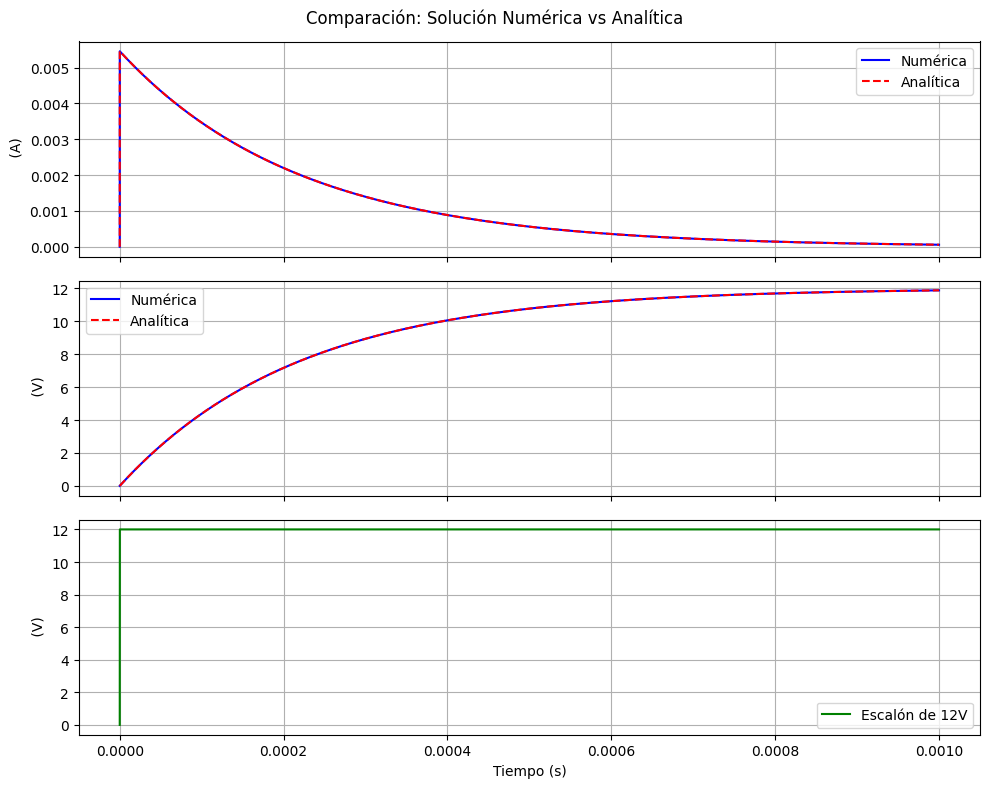

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# ========== PAR√ÅMETROS DE SIMULACI√ìN ==========
h = 1e-9           # Paso de tiempo (1 ns)
t_simul = 1e-3     # Tiempo de simulaci√≥n (10 ¬µs)
R = 2.2e3          # Resistencia (2.2 kŒ©)
L = 10e-6          # Inductancia (10 ¬µH)
C = 100e-9         # Capacitancia (100 nF)

# ========== SOLUCI√ìN NUM√âRICA ==========
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicializaci√≥n de variables
x1 = np.zeros(int(t_simul / h))  # Corriente i(t)
x2 = np.zeros(int(t_simul / h))  # Tensi√≥n v(t)
u = np.zeros(int(t_simul / h))   # Entrada Va(t)
t = np.zeros(int(t_simul / h))   # Vector de tiempo

x = np.array([[0.0], [0.0]])     # Condiciones iniciales [i(0)=0, v(0)=0]
Va = 0                           # Voltaje inicial Va(0)=0

for ii in range(int(t_simul / h)):
    xp = np.matmul(A, x) + B * Va  # Derivada del estado
    x = x + xp * h                 # Integraci√≥n Euler
    u[ii] = Va                     # Almacena Va(t)
    Va = 12                        # Escal√≥n de 12V en t > 0
    x1[ii] = x[0, 0]               # Almacena i(t)
    x2[ii] = x[1, 0]               # Almacena v(t)
    t[ii] = ii * h                 # Almacena tiempo

# ========== SOLUCI√ìN ANAL√çTICA ==========
i_analitico = 0.00545477 * np.exp(-4545.55 * t) - 0.00545477 * np.exp(-2.19995e8 * t)
v_analitico = 12 + 0.000247949 * np.exp(-2.19995e8 * t) - 12.0002 * np.exp(-4545.55 * t)

# ========== GR√ÅFICAS ==========
fig, axs = plt.subplots(3, figsize=(10, 8), sharex=True)
fig.suptitle('Comparaci√≥n: Soluci√≥n Num√©rica vs Anal√≠tica')

# --- Gr√°fica 1: Corriente i(t) ---
axs[0].plot(t, x1, 'b-', linewidth=1.5, label='Num√©rica')
axs[0].plot(t, i_analitico, 'r--', linewidth=1.5, label='Anal√≠tica')
axs[0].set_ylabel(' (A)')
axs[0].grid(True)
axs[0].legend()

# --- Gr√°fica 2: Tensi√≥n v(t) ---
axs[1].plot(t, x2, 'b-', linewidth=1.5, label='Num√©rica')
axs[1].plot(t, v_analitico, 'r--', linewidth=1.5, label='Anal√≠tica')
axs[1].set_ylabel(' (V)')
axs[1].grid(True)
axs[1].legend()

# --- Gr√°fica 3: Entrada Va(t) ---
axs[2].plot(t, u, 'g-', linewidth=1.5, label='Escal√≥n de 12V')
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

$i(t)$ alcanza r√°pidamente el valor $0 \text{ A}$ y $V_C(t)$ alcanzar√° r√°pidamente el valor $12 \text{ V}$, por ser el sistema sobreamortiguado con $\zeta = 110 \gg 1$.


3- Asumir que la tensi√≥n de entrada cambia de signo cada 1ms.

Se considera R= 2200 Œ©, L=10-5 H, C=10-7 y 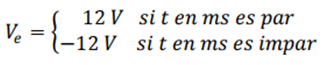

Para 0 < t < 1 ms se tiene la soluci√≥n ya encontrada
Para el intervalo 1 ‚â§ t < 2 ms, y los siguientes, se deben tener en cuenta como condiciones iniciales los valores finales de i(t) y v(t) del intervalo anterior.


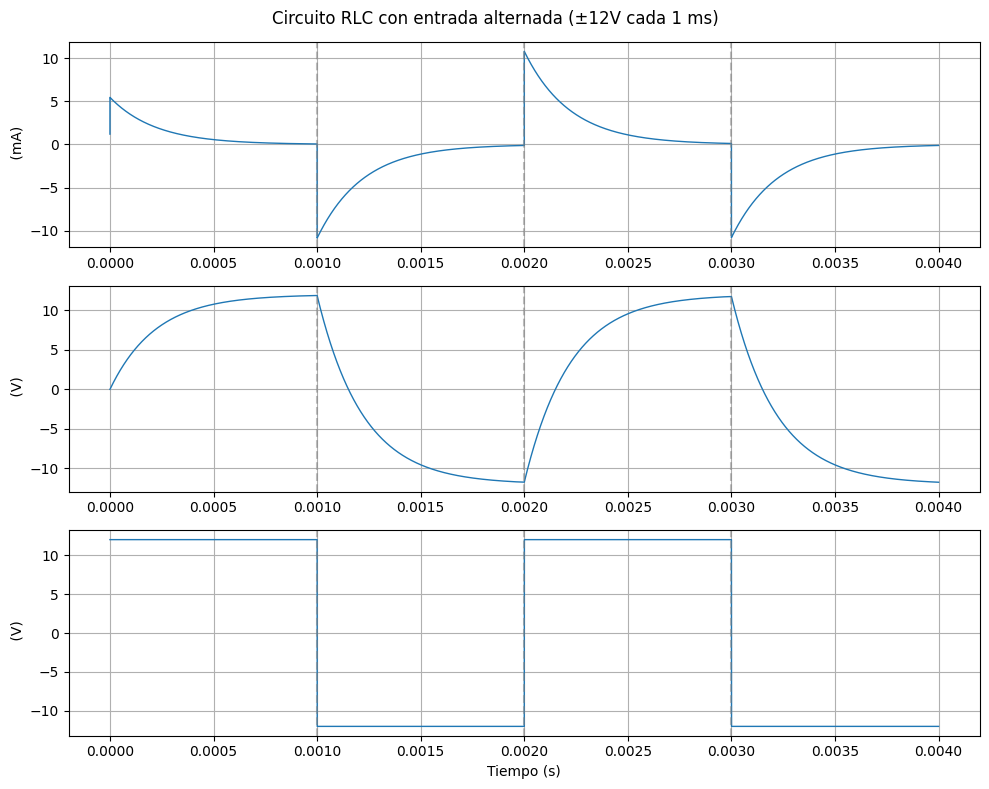

In [40]:
# @title
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
warnings.filterwarnings("ignore", category=DeprecationWarning, module='numpy')

h = 1e-9  # Paso de tiempo
t_simul = 4e-3  # Extendemos la simulaci√≥n a 4 ms para ver 2 ciclos completos
R = 2.2e3  # 2.2 kOhm
L = 10e-6  # 10 microHenrios
C = 100e-9  # 100 nF

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicializaci√≥n de variables
x1 = np.linspace(0, 0, int(t_simul/h))  # Corriente (i_L)
x2 = np.linspace(0, 0, int(t_simul/h))  # Voltaje en capacitor (v_c)
u = np.linspace(0, 0, int(t_simul/h))   # Voltaje de entrada (V_a)
t = np.linspace(0, 0, int(t_simul/h))   # Vector de tiempo

# Condiciones iniciales
Va = 12  # Voltaje inicial (empezamos con +12V)
x = np.array([[0], [0]])  # [i_L(0); v_c(0)]
xp = np.array([[0], [0]])

# Simulaci√≥n
for ii in range(int(t_simul/h)):
    # Cambio de polaridad cada 1 ms
    if ii * h >= 1e-3 and ii * h < 2e-3:
        Va = -12
    elif ii * h >= 2e-3 and ii * h < 3e-3:
        Va = 12
    elif ii * h >= 3e-3:
        Va = -12

    # Integraci√≥n del sistema
    xp = np.matmul(A, x) + B * Va
    x = x + xp * h

    # Almacenamiento de resultados
    u[ii] = Va
    x1[ii] = x[0]  # Corriente i_L
    x2[ii] = x[1]  # Voltaje v_c
    t[ii] = ii * h

# Gr√°ficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC con entrada alternada (¬±12V cada 1 ms)')

# Corriente en el inductor
axs[0].plot(t, x1 * 1000, linewidth=1.0)  # Convertimos a mA
axs[0].grid(True)
axs[0].set_ylabel(' (mA)')

# Voltaje en el capacitor
axs[1].plot(t, x2, linewidth=1.0)
axs[1].set_ylabel(' (V)')
axs[1].grid(True)

# Voltaje de entrada
axs[2].plot(t, u, linewidth=1.0)
axs[2].grid(True)
axs[2].set_ylabel(' (V)')
axs[2].set_xlabel('Tiempo (s)')

# L√≠neas verticales para marcar los cambios
for ms in [1e-3, 2e-3, 3e-3]:
    axs[0].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[1].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[2].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
show()


Se observa la variaci√≥n de i(t) y de vc(t) cada 1 ms, con un cambio de signo y el comportamiento sobreamortiguado.

Ejercicio 2. C√°lculo simb√≥lico de linealizaci√≥n de sistemas din√°micos
Se propone implementar simb√≥licamente las expresiones de Taylor para el caso de un sistema din√°mico con varias variables de estado.

Sea el sistema din√°mico no lineal expresado en variables de estado dado por


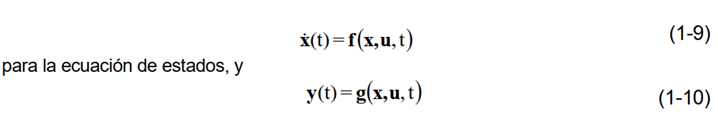

para la ecuaci√≥n de salida, se pretende hallar una expresi√≥n lineal del mismo.

Para ello, si las funciones $f$ y $g$ fuesen vectoriales, lo cual significa que $Y \in \mathbb{R}^m$, $X \in \mathbb{R}^n$ y $U \in \mathbb{R}^r$ tienen varias componentes, entonces se emplean las siguientes expresiones para el c√°lculo del modelo linealizado:

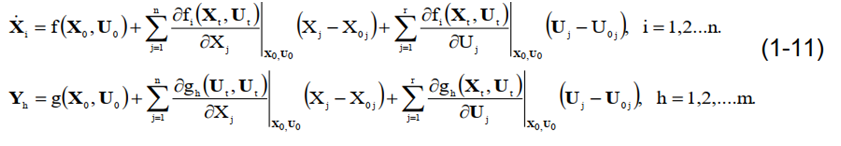

La (1-11) toma la forma

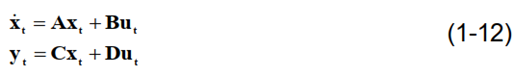

con x0=x(0), donde A, B, C y D son matrices.

Ejercicio 2. Actividad integradora

Sabiendo que un sistema lineal en variables de estado tiene la representaci√≥n

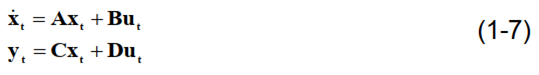

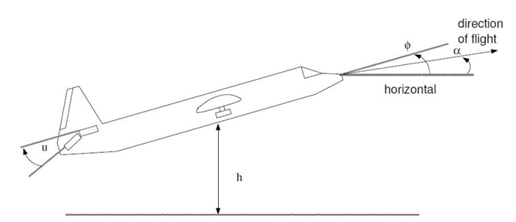

Fig. 1-3. Modelo de sistema de altitud en un avi√≥n

Para el caso de la Fig. 1-3, modelo v√°lido s√≥lo para peque√±os √°ngulos, se tiene

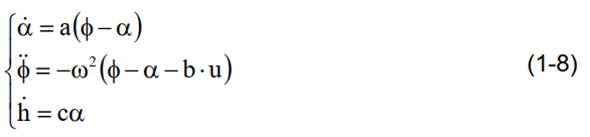

donde $\omega > 0$ representa la frecuencia natural, y los coeficientes $a$, $b$ son constantes positivas. $u$ es la variable manipulada y es proporcional a la posici√≥n de los elevadores. $\phi$ (√°ngulo de cabeceo) en radianes. El veh√≠culo vuela a $c$ metros por segundo, su trayectoria de vuelo forma un √°ngulo $\alpha$ con la horizontal (si $\alpha > 0$ sube, si $\alpha < 0$ desciende). Elegir $x_1=\alpha$, $x_2=\phi$, $x_3=\dot{\alpha}$ y $x_4=h$. Se pide:

1. Obtener el sistema lineal en variables de estado para el equilibrio $x = [0 \ 0 \ 0 \ 0]^T$.



In [10]:
# @title
import sympy as sp
import numpy as np

# --- 1. Definir las variables simb√≥licas ---
# Estados
alpha, phi, phidot, h = sp.symbols('alpha phi phidot h') # phidot es d(phi)/dt
x_sym = sp.Matrix([alpha, phi, phidot, h])

# Entrada
u = sp.symbols('u')

# Constantes del sistema
a, b, c, omega = sp.symbols('a b c omega', positive=True) # positive=True para indicar que son positivas

print("Variables de estado simb√≥licas (x):")
print(x_sym)
print("\nVariable de entrada simb√≥lica (u):")
print(u)
print("\nConstantes del sistema simb√≥licas:")
print(f"a = {a}, b = {b}, c = {c}, omega = {omega}")

# --- 2. Definir las ecuaciones del sistema (como un vector de derivadas de estado) ---
# Recordar que nuestras ecuaciones son:
# 1. d(alpha)/dt = a*(phi - alpha)
# 2. d(phi)/dt = phidot (esto es una definici√≥n de estado)
# 3. d(phidot)/dt = -omega**2 * (phi - alpha - b * u)
# 4. d(h)/dt = c * alpha

# F_x es el vector de las funciones de estado (lado derecho de dx/dt = f(x, u))
# Cada elemento de F_x corresponde a la derivada de cada estado en x_sym
F_x = sp.Matrix([
    a * (phi - alpha),
    phidot,
    -omega**2 * (phi - alpha - b * u),
    c * alpha
])

print("\nVector de funciones de estado (F(x,u)):")
print(F_x)

# --- 3. Calcular la Matriz A (Jacobiano de F_x respecto a x_sym) ---
# A = d(F_x) / d(x_sym)
A_sym = F_x.jacobian(x_sym)

print("\nMatriz A (simb√≥lica):")
display(A_sym) # Usar display para una mejor visualizaci√≥n en Colab

# --- 4. Calcular la Matriz B (Jacobiano de F_x respecto a u) ---
# B = d(F_x) / d(u)
B_sym = F_x.jacobian(sp.Matrix([u])) # Asegurarse de que u sea una matriz para jacobian

print("\nMatriz B (simb√≥lica):")
display(B_sym)

# --- 5. Definir las matrices C y D (para el caso donde las salidas son los mismos estados) ---
# Si y = x, entonces C es la matriz identidad y D es la matriz de ceros.
C_sym = sp.eye(len(x_sym)) # Matriz identidad del tama√±o del vector de estado
D_sym = sp.zeros(len(x_sym), len(sp.Matrix([u]))) # Matriz de ceros con dimensiones adecuadas

print("\nMatriz C (simb√≥lica):")
display(C_sym)

print("\nMatriz D (simb√≥lica):")
display(D_sym)

print("\n--- Sistema Lineal en Variables de Estado (Simb√≥lico) ---")
print(f"Vector de Estado (x): {x_sym.T}") # .T para mostrar como fila
print(f"Vector de Entrada (u): {u}")

print("\nMatrices obtenidas:")
print("A =")
display(A_sym)
print("B =")
display(B_sym)
print("C =")
display(C_sym)
print("D =")
display(D_sym)

# --- Verificaci√≥n del equilibrio x = [0 0 0 0]T ---
print("\n--- Verificaci√≥n del Equilibrio x = [0 0 0 0]T ---")
# Sustituir x = 0 en F_x
F_x_at_zero = F_x.subs({alpha: 0, phi: 0, phidot: 0, h: 0})
print("F(x,u) evaluado en x = [0 0 0 0]T:")
display(F_x_at_zero)

# Para que F_x_at_zero sea cero (es decir, dx/dt = 0), necesitamos que:
# 0 = a * (0 - 0) --> 0 = 0 (siempre cierto)
# 0 = 0 (siempre cierto)
# 0 = -omega**2 * (0 - 0 - b * u) --> 0 = omega**2 * b * u
# 0 = c * 0 --> 0 = 0 (siempre cierto)

# De 0 = omega**2 * b * u, como omega > 0 y b > 0, se deduce que u debe ser 0.
print(f"\nPara que x = [0 0 0 0]T sea un punto de equilibrio, se requiere que u = {sp.solve(omega**2 * b * u, u)[0]}")
print("Esto confirma que el modelo lineal ya est√° centrado alrededor de este punto de equilibrio (si u=0).")

Variables de estado simb√≥licas (x):
Matrix([[alpha], [phi], [phidot], [h]])

Variable de entrada simb√≥lica (u):
u

Constantes del sistema simb√≥licas:
a = a, b = b, c = c, omega = omega

Vector de funciones de estado (F(x,u)):
Matrix([[a*(-alpha + phi)], [phidot], [-omega**2*(-alpha - b*u + phi)], [alpha*c]])

Matriz A (simb√≥lica):


‚é°-a   a   0  0‚é§
‚é¢             ‚é•
‚é¢0    0   1  0‚é•
‚é¢             ‚é•
‚é¢ 2    2      ‚é•
‚é¢œâ   -œâ   0  0‚é•
‚é¢             ‚é•
‚é£c    0   0  0‚é¶


Matriz B (simb√≥lica):


‚é° 0  ‚é§
‚é¢    ‚é•
‚é¢ 0  ‚é•
‚é¢    ‚é•
‚é¢   2‚é•
‚é¢b‚ãÖœâ ‚é•
‚é¢    ‚é•
‚é£ 0  ‚é¶


Matriz C (simb√≥lica):


‚é°1  0  0  0‚é§
‚é¢          ‚é•
‚é¢0  1  0  0‚é•
‚é¢          ‚é•
‚é¢0  0  1  0‚é•
‚é¢          ‚é•
‚é£0  0  0  1‚é¶


Matriz D (simb√≥lica):


‚é°0‚é§
‚é¢ ‚é•
‚é¢0‚é•
‚é¢ ‚é•
‚é¢0‚é•
‚é¢ ‚é•
‚é£0‚é¶


--- Sistema Lineal en Variables de Estado (Simb√≥lico) ---
Vector de Estado (x): Matrix([[alpha, phi, phidot, h]])
Vector de Entrada (u): u

Matrices obtenidas:
A =


‚é°-a   a   0  0‚é§
‚é¢             ‚é•
‚é¢0    0   1  0‚é•
‚é¢             ‚é•
‚é¢ 2    2      ‚é•
‚é¢œâ   -œâ   0  0‚é•
‚é¢             ‚é•
‚é£c    0   0  0‚é¶

B =


‚é° 0  ‚é§
‚é¢    ‚é•
‚é¢ 0  ‚é•
‚é¢    ‚é•
‚é¢   2‚é•
‚é¢b‚ãÖœâ ‚é•
‚é¢    ‚é•
‚é£ 0  ‚é¶

C =


‚é°1  0  0  0‚é§
‚é¢          ‚é•
‚é¢0  1  0  0‚é•
‚é¢          ‚é•
‚é¢0  0  1  0‚é•
‚é¢          ‚é•
‚é£0  0  0  1‚é¶

D =


‚é°0‚é§
‚é¢ ‚é•
‚é¢0‚é•
‚é¢ ‚é•
‚é¢0‚é•
‚é¢ ‚é•
‚é£0‚é¶


--- Verificaci√≥n del Equilibrio x = [0 0 0 0]T ---
F(x,u) evaluado en x = [0 0 0 0]T:


‚é°  0   ‚é§
‚é¢      ‚é•
‚é¢  0   ‚é•
‚é¢      ‚é•
‚é¢   2  ‚é•
‚é¢b‚ãÖœâ ‚ãÖu‚é•
‚é¢      ‚é•
‚é£  0   ‚é¶


Para que x = [0 0 0 0]T sea un punto de equilibrio, se requiere que u = 0
Esto confirma que el modelo lineal ya est√° centrado alrededor de este punto de equilibrio (si u=0).


1. Obtener la soluci√≥n num√©rica del sistema lineal para evaluar cuantitativamente el comportamiento con intenci√≥n de verificar el correcto planteo. Para hacerlo, se le asignan los valores siguientes a los par√°metros: $\omega=0.2$; $a=0.01$; $b=2$; $c=100 \text{ m/s}$ (es decir, $360 \text{ Km/h}$); $\Delta t=10^{-3}$; y el tiempo de simulaci√≥n de $5 \text{ segundos}$.


Par√°metros asignados: 
omega = 0.2, a = 0.01, b = 2, c = 100

Matriz A (num√©rica):
[[-1.e-02  1.e-02  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00  0.e+00]
 [ 4.e-02 -4.e-02  0.e+00  0.e+00]
 [ 1.e+02  0.e+00  0.e+00  0.e+00]]

Matriz B (num√©rica):
[[0.  ]
 [0.  ]
 [0.08]
 [0.  ]]

Matriz C (num√©rica):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz D (num√©rica):
[[0.]
 [0.]
 [0.]
 [0.]]

Condiciones iniciales (x0 = [alpha, phi, phidot, h]): [0.01 0.05 0.   0.  ]

Se√±al de entrada (u): Escal√≥n de 0.1 rad a los 1.0 segundos.


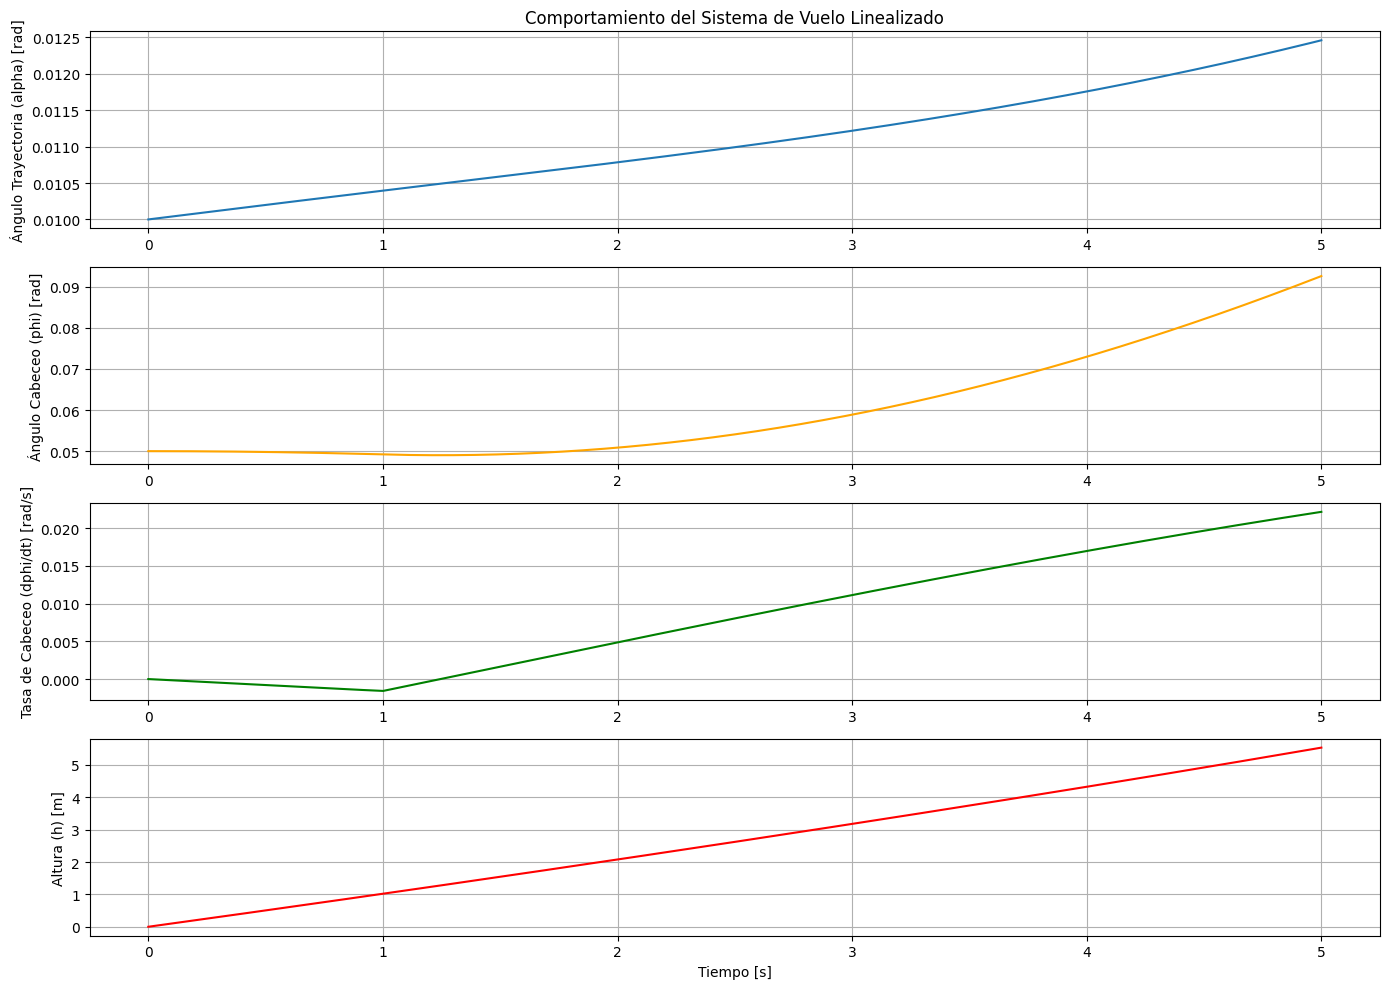


--- An√°lisis de los resultados ---
Observaciones t√≠picas (dependiendo de los par√°metros):
- **Alpha (√Ångulo de Trayectoria):** Un cambio en el elevador (u) o en el cabeceo (phi) deber√≠a afectar la trayectoria.
- **Phi (√Ångulo de Cabeceo):** La deflexi√≥n del elevador (u) influye directamente en la din√°mica de cabeceo (phidot).
- **Phidot (Tasa de Cabeceo):** Esta variable mostrar√° la velocidad de rotaci√≥n alrededor del eje lateral. Deber√≠a estabilizarse si el sistema es estable.
- **H (Altura):** Dado que d(h)/dt = c*alpha, la altitud cambiar√° en funci√≥n del √°ngulo de trayectoria de vuelo (alpha) y la velocidad del avi√≥n (c).

Altura final a los 5 segundos: 5.54 metros
√Ångulo de trayectoria final (alpha) a los 5 segundos: 0.0125 radianes
√Ångulo de cabeceo final (phi) a los 5 segundos: 0.0926 radianes
Tasa de cabeceo final (dphi/dt) a los 5 segundos: 0.0222 rad/s


In [11]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definir los valores num√©ricos de los par√°metros ---
omega_val = 0.2
a_val = 0.01
b_val = 2
c_val = 100

print(f"Par√°metros asignados: \nomega = {omega_val}, a = {a_val}, b = {b_val}, c = {c_val}")

# --- 2. Sustituir los valores en las matrices A, B, C, D ---
# Las matrices simb√≥licas obtenidas fueron:
# A = [[-a, a, 0, 0],
#      [0, 0, 1, 0],
#      [omega**2, -omega**2, 0, 0],
#      [c, 0, 0, 0]]

# B = [[0],
#      [0],
#      [omega**2 * b],
#      [0]]

# C = [[1, 0, 0, 0],
#      [0, 1, 0, 0],
#      [0, 0, 1, 0],
#      [0, 0, 0, 1]]

# D = [[0],
#      [0],
#      [0],
#      [0]]

A_num = np.array([
    [-a_val, a_val, 0, 0],
    [0, 0, 1, 0],
    [omega_val**2, -omega_val**2, 0, 0],
    [c_val, 0, 0, 0]
])

B_num = np.array([
    [0],
    [0],
    [omega_val**2 * b_val],
    [0]
])

C_num = np.identity(4) # Matriz identidad de 4x4
D_num = np.zeros((4, 1)) # Matriz de ceros de 4x1

print("\nMatriz A (num√©rica):")
print(A_num)
print("\nMatriz B (num√©rica):")
print(B_num)
print("\nMatriz C (num√©rica):")
print(C_num)
print("\nMatriz D (num√©rica):")
print(D_num)

# --- 3. Crear el objeto de sistema de espacio de estados ---
sys_num = signal.StateSpace(A_num, B_num, C_num, D_num)

# --- 4. Definir el tiempo de simulaci√≥n y el paso de tiempo ---
sim_time = 5 # segundos
dt = 1e-3 # segundos
num_points = int(sim_time / dt) + 1
t = np.linspace(0, sim_time, num_points)

# --- 5. Definir las condiciones iniciales ---
# x = [alpha, phi, phidot, h]
# Asumimos una perturbaci√≥n inicial en el √°ngulo de cabeceo (phi)
# y una peque√±a perturbaci√≥n en el √°ngulo de trayectoria (alpha)
x0 = np.array([0.01, 0.05, 0.0, 0.0]) # alpha=0.01 rad, phi=0.05 rad, phidot=0, h=0

print(f"\nCondiciones iniciales (x0 = [alpha, phi, phidot, h]): {x0}")

# --- 6. Definir la se√±al de entrada u(t) ---
# Elevador inicialmente en cero, luego un escal√≥n de 0.1 rad a los 1 segundo
u_input = np.zeros(num_points)
# √çndice de tiempo donde se aplica el escal√≥n
idx_step = int(1.0 / dt)
u_input[idx_step:] = 0.1 # Elevador se deflecta 0.1 radianes

print(f"\nSe√±al de entrada (u): Escal√≥n de {u_input[idx_step]} rad a los {t[idx_step]} segundos.")

# --- 7. Simular el sistema ---
tout, yout, xout = signal.lsim(sys_num, U=u_input, T=t, X0=x0)

# Las columnas de xout son: alpha, phi, phidot, h
alpha_out = xout[:, 0]
phi_out = xout[:, 1]
phidot_out = xout[:, 2]
h_out = xout[:, 3]

# --- 8. Graficar los resultados ---
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(tout, alpha_out)
plt.title('Comportamiento del Sistema de Vuelo Linealizado')
plt.ylabel('√Ångulo Trayectoria (alpha) [rad]')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tout, phi_out, color='orange')
plt.ylabel('√Ångulo Cabeceo (phi) [rad]')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tout, phidot_out, color='green')
plt.ylabel('Tasa de Cabeceo (dphi/dt) [rad/s]')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tout, h_out, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Altura (h) [m]')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- An√°lisis de los resultados ---")
print("Observaciones t√≠picas (dependiendo de los par√°metros):")
print("- **Alpha (√Ångulo de Trayectoria):** Un cambio en el elevador (u) o en el cabeceo (phi) deber√≠a afectar la trayectoria.")
print("- **Phi (√Ångulo de Cabeceo):** La deflexi√≥n del elevador (u) influye directamente en la din√°mica de cabeceo (phidot).")
print("- **Phidot (Tasa de Cabeceo):** Esta variable mostrar√° la velocidad de rotaci√≥n alrededor del eje lateral. Deber√≠a estabilizarse si el sistema es estable.")
print("- **H (Altura):** Dado que d(h)/dt = c*alpha, la altitud cambiar√° en funci√≥n del √°ngulo de trayectoria de vuelo (alpha) y la velocidad del avi√≥n (c).")
print(f"\nAltura final a los {sim_time} segundos: {h_out[-1]:.2f} metros")
print(f"√Ångulo de trayectoria final (alpha) a los {sim_time} segundos: {alpha_out[-1]:.4f} radianes")
print(f"√Ångulo de cabeceo final (phi) a los {sim_time} segundos: {phi_out[-1]:.4f} radianes")
print(f"Tasa de cabeceo final (dphi/dt) a los {sim_time} segundos: {phidot_out[-1]:.4f} rad/s")

3. Obtener la soluci√≥n num√©rica del sistema lineal para $c=50 \text{ m/s}$ (es decir, $180 \text{ Km/h}$), $\Delta t=10^{-3}$; y el tiempo de simulaci√≥n de $20 \text{ segundos}$.


Par√°metros asignados: 
omega = 0.2, a = 0.01, b = 2, c = 50.0

Matriz A (num√©rica):
[[-1.e-02  1.e-02  0.e+00  0.e+00]
 [ 0.e+00  0.e+00  1.e+00  0.e+00]
 [ 4.e-02 -4.e-02  0.e+00  0.e+00]
 [ 5.e+01  0.e+00  0.e+00  0.e+00]]

Matriz B (num√©rica):
[[0.  ]
 [0.  ]
 [0.08]
 [0.  ]]

Matriz C (num√©rica):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Matriz D (num√©rica):
[[0.]
 [0.]
 [0.]
 [0.]]

Condiciones iniciales (x0 = [alpha, phi, phidot, h]): [0.01 0.05 0.   0.  ]

Se√±al de entrada (u): Escal√≥n de 0.1 rad a los 1.0 segundos.


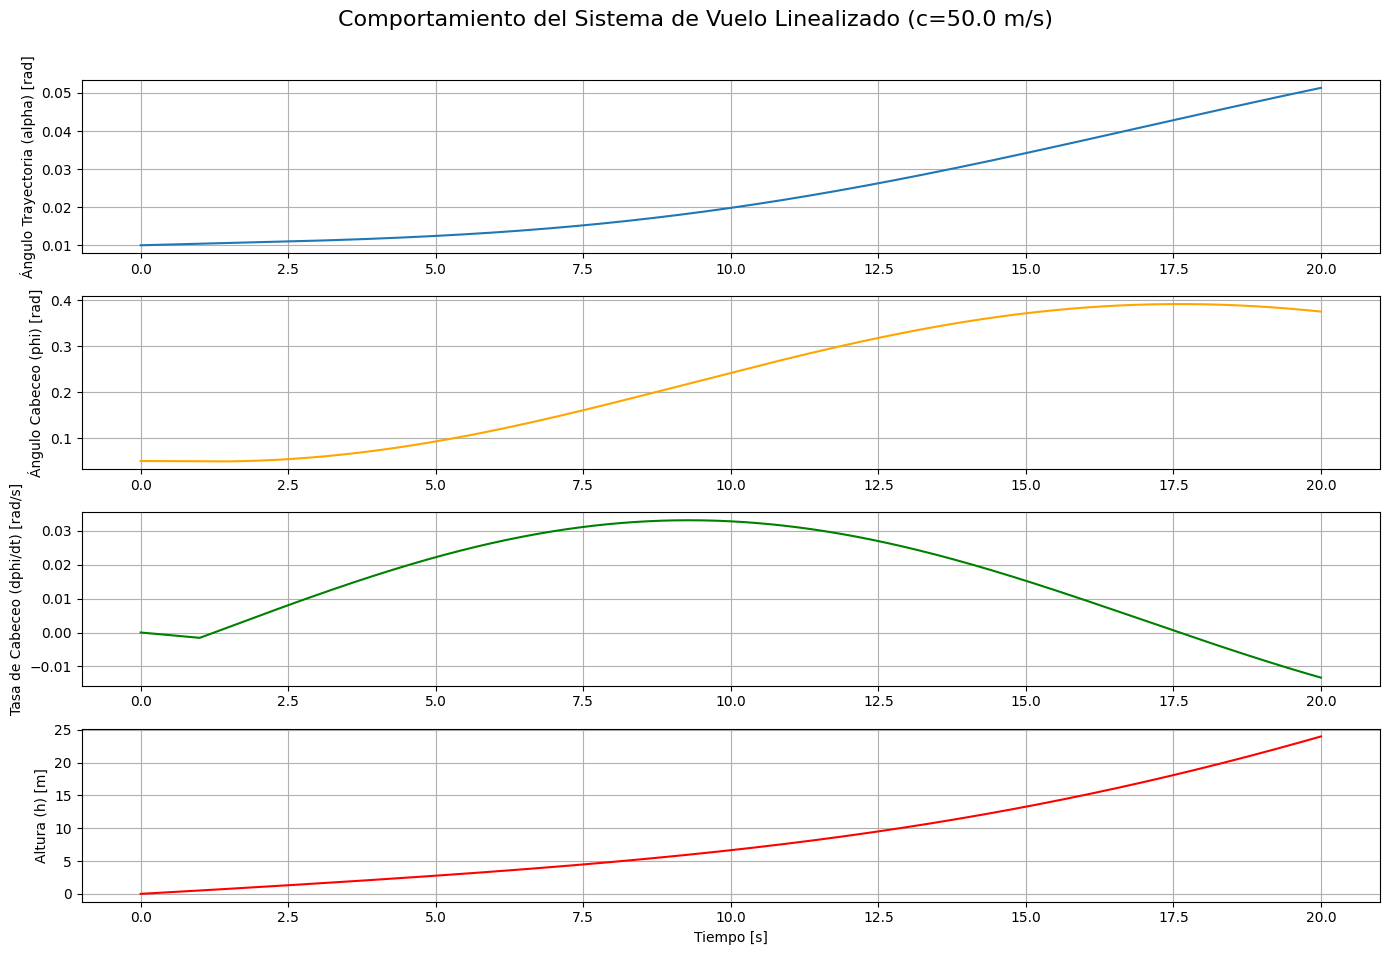


--- An√°lisis de los resultados ---
Altura final a los 20 segundos: 23.99 metros
√Ångulo de trayectoria final (alpha) a los 20 segundos: 0.0513 radianes
√Ångulo de cabeceo final (phi) a los 20 segundos: 0.3751 radianes
Tasa de cabeceo final (dphi/dt) a los 20 segundos: -0.0133 rad/s

Observaciones clave al comparar con la simulaci√≥n anterior:
- La principal diferencia se ver√° en la evoluci√≥n de la ALTURA (h).
- Como d(h)/dt = c*alpha, y ahora 'c' es la mitad, la tasa de cambio de la altitud ser√° menor para el mismo 'alpha'.
- Esto significa que el cambio total en la altitud a lo largo del tiempo de simulaci√≥n ser√° menos pronunciado o tomar√° m√°s tiempo para alcanzar
un cambio significativo, asumiendo que el comportamiento de 'alpha' no cambia dr√°sticamente.
- El tiempo de simulaci√≥n extendido a 20 segundos permitir√° observar mejor la din√°mica de estabilizaci√≥n o el comportamiento a largo plazo.


In [41]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definir los valores num√©ricos de los par√°metros ---
omega_val = 0.2
a_val = 0.01
b_val = 2
c_val = 50.0

print(f"Par√°metros asignados: \nomega = {omega_val}, a = {a_val}, b = {b_val}, c = {c_val}")

# --- 2. Sustituir los valores en las matrices A, B, C, D ---
# Las matrices simb√≥licas obtenidas fueron:
# A = [[-a, a, 0, 0],
#      [0, 0, 1, 0],
#      [omega**2, -omega**2, 0, 0],
#      [c, 0, 0, 0]]

# B = [[0],
#      [0],
#      [omega**2 * b],
#      [0]]

# C = [[1, 0, 0, 0],
#      [0, 1, 0, 0],
#      [0, 0, 1, 0],
#      [0, 0, 0, 1]]

# D = [[0],
#      [0],
#      [0],
#      [0]]

A_num = np.array([
    [-a_val, a_val, 0, 0],
    [0, 0, 1, 0],
    [omega_val**2, -omega_val**2, 0, 0],
    [c_val, 0, 0, 0]
])

B_num = np.array([
    [0],
    [0],
    [omega_val**2 * b_val],
    [0]
])

C_num = np.identity(4) # Matriz identidad de 4x4
D_num = np.zeros((4, 1)) # Matriz de ceros de 4x1

print("\nMatriz A (num√©rica):")
print(A_num)
print("\nMatriz B (num√©rica):")
print(B_num)
print("\nMatriz C (num√©rica):")
print(C_num)
print("\nMatriz D (num√©rica):")
print(D_num)

# --- 3. Crear el objeto de sistema de espacio de estados ---
sys_num = signal.StateSpace(A_num, B_num, C_num, D_num)

# --- 4. Definir el tiempo de simulaci√≥n y el paso de tiempo ---
sim_time = 20 # ¬°NUEVO TIEMPO DE SIMULACI√ìN!
dt = 1e-3 # segundos
num_points = int(sim_time / dt) + 1
t = np.linspace(0, sim_time, num_points)

# --- 5. Definir las condiciones iniciales ---
# x = [alpha, phi, phidot, h]
# Mismas condiciones iniciales que antes
x0 = np.array([0.01, 0.05, 0.0, 0.0]) # alpha=0.01 rad, phi=0.05 rad, phidot=0, h=0

print(f"\nCondiciones iniciales (x0 = [alpha, phi, phidot, h]): {x0}")

# --- 6. Definir la se√±al de entrada u(t) ---
# Elevador inicialmente en cero, luego un escal√≥n de 0.1 rad a los 1 segundo
u_input = np.zeros(num_points)
# √çndice de tiempo donde se aplica el escal√≥n
idx_step = int(1.0 / dt)
u_input[idx_step:] = 0.1 # Elevador se deflecta 0.1 radianes

print(f"\nSe√±al de entrada (u): Escal√≥n de {u_input[idx_step]} rad a los {t[idx_step]} segundos.")

# --- 7. Simular el sistema ---
tout, yout, xout = signal.lsim(sys_num, U=u_input, T=t, X0=x0)

# Las columnas de xout son: alpha, phi, phidot, h
alpha_out = xout[:, 0]
phi_out = xout[:, 1]
phidot_out = xout[:, 2]
h_out = xout[:, 3]

# --- 8. Graficar los resultados ---
plt.figure(figsize=(14, 10))
plt.suptitle(f'Comportamiento del Sistema de Vuelo Linealizado (c={c_val} m/s)', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(tout, alpha_out)
plt.ylabel('√Ångulo Trayectoria (alpha) [rad]')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tout, phi_out, color='orange')
plt.ylabel('√Ångulo Cabeceo (phi) [rad]')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tout, phidot_out, color='green')
plt.ylabel('Tasa de Cabeceo (dphi/dt) [rad/s]')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tout, h_out, color='red')
plt.xlabel('Tiempo [s]')
plt.ylabel('Altura (h) [m]')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Ajusta el espacio para el suptitle
plt.show()

print("\n--- An√°lisis de los resultados ---")
print(f"Altura final a los {sim_time} segundos: {h_out[-1]:.2f} metros")
print(f"√Ångulo de trayectoria final (alpha) a los {sim_time} segundos: {alpha_out[-1]:.4f} radianes")
print(f"√Ångulo de cabeceo final (phi) a los {sim_time} segundos: {phi_out[-1]:.4f} radianes")
print(f"Tasa de cabeceo final (dphi/dt) a los {sim_time} segundos: {phidot_out[-1]:.4f} rad/s")
print("\nObservaciones clave al comparar con la simulaci√≥n anterior:")
print(f"- La principal diferencia se ver√° en la evoluci√≥n de la ALTURA (h).")
print(f"- Como d(h)/dt = c*alpha, y ahora 'c' es la mitad, la tasa de cambio de la altitud ser√° menor para el mismo 'alpha'.")
print(f"- Esto significa que el cambio total en la altitud a lo largo del tiempo de simulaci√≥n ser√° menos pronunciado o tomar√° m√°s tiempo para alcanzar")
print(f"un cambio significativo, asumiendo que el comportamiento de 'alpha' no cambia dr√°sticamente.")
print(f"- El tiempo de simulaci√≥n extendido a 20 segundos permitir√° observar mejor la din√°mica de estabilizaci√≥n o el comportamiento a largo plazo.")

Ejercicio 3. Linealizaci√≥n de un sistema no lineal y verificaci√≥n en
simulaci√≥n num√©rica

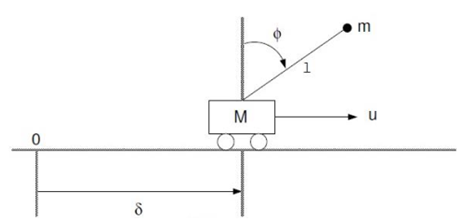

Para el caso del esquema del p√©ndulo invertido de la Fig. 1-4 se tiene,

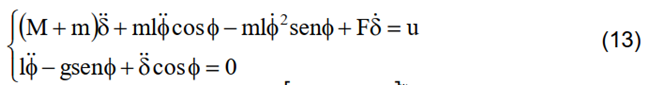

donde el sistema lineal en variables de estado $x = [\delta \ \dot{\delta} \ \phi \ \dot{\phi}]^T$, con los valores de los coeficientes de $m=0.1$; $F=0.1$; $l=0.6$; $g=9.8$; $M=0.5$ y $\Delta t=10^{-4} \text{ seg}$, tomando un tiempo de simulaci√≥n de $5 \text{ segundos}$ con $u=0$.

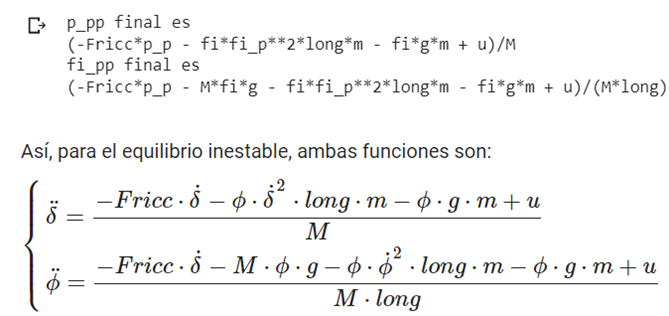

Fig. 1-5. Respuesta del Python en Colab el equilibrio inestable.
Se pide:

1. Obtener la versi√≥n linealizada en los equilibrios del sistema empleando el paquete de c√°lculo simb√≥lico, tomando como referencia las instrucciones del Script de la Tabla 1-1. Se sugiere realizar la aproximaci√≥n de las funciones coseno y seno por su variable correspondiente en el punto de operaci√≥n, y luego mediante el *software* obtener las expresiones que se muestran en la Fig. 1-5, donde $\ddot{\phi}$ es fi_pp y $\ddot{\delta}$ es p_pp.


In [21]:
# @title
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simb√≥licas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio estable")

# Valor del √°ngulo inicial en equilibrio
ang_inic = pi

# Ecuaci√≥n para p_pp
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Ecuaci√≥n para fi_pp, considerando sin(fi) ‚âà pi - fi
fi_pp_expr = solve(fi_pp - (1 / long) * (g * (pi - fi) + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar derivadas para construir la matriz A, alrededor del punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz A final
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

print("Matriz A =")
pprint(Mat_A)


Para el equilibrio estable
fi_pp =
                                       2                            
-Fricc‚ãÖp‚Çö - M‚ãÖg‚ãÖ(fi - œÄ) - fi‚ãÖg‚ãÖm - fi‚Çö ‚ãÖlong‚ãÖm‚ãÖ(fi - œÄ) + œÄ‚ãÖg‚ãÖm + u
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                               M‚ãÖlong                               
p_pp =
                  2                        2                   
-Fricc‚ãÖp‚Çö - fi‚ãÖfi‚Çö ‚ãÖlong‚ãÖm - fi‚ãÖg‚ãÖm + œÄ‚ãÖfi‚Çö ‚ãÖlong‚ãÖm + œÄ‚ãÖg‚ãÖm + u
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                               M                               
Matriz A =
‚é°0     1         0       0‚é§
‚é¢                         ‚é•
‚é¢   -Fricc     -g‚ãÖm       

In [22]:
# @title
from sympy import symbols, pi, simplify, solve, diff, Matrix, pprint

# Declarar las variables simb√≥licas
fi, fi_p, fi_pp, p, p_p, p_pp = symbols('fi fi_p fi_pp p p_p p_pp')
M, m, u, long, Fricc, g = symbols('M m u long Fricc g')

print("Para el equilibrio inestable")

# √Ångulo de equilibrio inestable
ang_inic = 0

# Ecuaci√≥n para p_pp (sin aproximaci√≥n a√∫n)
p_pp_expr = (1 / (M + m)) * (u + m * long * fi_pp + m * long * fi_p**2 * (pi - fi) - Fricc * p_p)

# Aproximaci√≥n: sin(fi) ‚âà fi, cos(fi) ‚âà 1 => fi_pp = (1/long) * (-g * fi + p_pp)
fi_pp_expr = solve(fi_pp - (1 / long) * (-g * fi + p_pp_expr), fi_pp)[0]

print('fi_pp =')
pprint(simplify(fi_pp_expr))

# Sustituir fi_pp en p_pp
p_pp_expr = p_pp_expr.subs(fi_pp, fi_pp_expr)

print('p_pp =')
pprint(simplify(p_pp_expr))

# Evaluar en el punto de equilibrio
subs_dict = {p: 0, p_p: 0, fi: ang_inic, fi_p: 0}

# Matriz A: derivadas parciales respecto de [p, p_p, fi, fi_p]
A_row2 = [
    simplify(diff(p_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]
A_row4 = [
    simplify(diff(fi_pp_expr, var).subs(subs_dict)) for var in [p, p_p, fi, fi_p]
]

# Matriz B: derivadas parciales respecto de la entrada u
B_row2 = simplify(diff(p_pp_expr, u).subs(subs_dict))
B_row4 = simplify(diff(fi_pp_expr, u).subs(subs_dict))

# Matrices A y B
Mat_A = Matrix([
    [0, 1, 0, 0],
    A_row2,
    [0, 0, 0, 1],
    A_row4
])

Mat_B = Matrix([
    [0],
    [B_row2],
    [0],
    [B_row4]
])

print('Matriz A =')
pprint(Mat_A)

print('Matriz B =')
pprint(Mat_B)


Para el equilibrio inestable
fi_pp =
                                 2                    
-Fricc‚ãÖp‚Çö - M‚ãÖfi‚ãÖg - fi‚ãÖg‚ãÖm - fi‚Çö ‚ãÖlong‚ãÖm‚ãÖ(fi - œÄ) + u
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                        M‚ãÖlong                        
p_pp =
                  2                        2           
-Fricc‚ãÖp‚Çö - fi‚ãÖfi‚Çö ‚ãÖlong‚ãÖm - fi‚ãÖg‚ãÖm + œÄ‚ãÖfi‚Çö ‚ãÖlong‚ãÖm + u
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                           M                           
Matriz A =
‚é°0     1         0       0‚é§
‚é¢                         ‚é•
‚é¢   -Fricc     -g‚ãÖm       ‚é•
‚é¢0  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ    ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ     0‚é•
‚é¢      M         M        ‚é•
‚é¢                         ‚é•
‚é¢0     0       

1. Obtener simulaciones del sistema (13) en las condiciones iniciales $x_0 = [0 \ 0 \ -0.01 \ 0]^T$ y $x_0 = [0 \ 0 \ 3.2 \ 0]^T$, empleando una integraci√≥n Euler con $\Delta t=10^{-4}$. El tiempo de simulaci√≥n ser√° de $10 \text{ segundos}$ en cada caso, con $u=0$.

Para el equilibrio estable

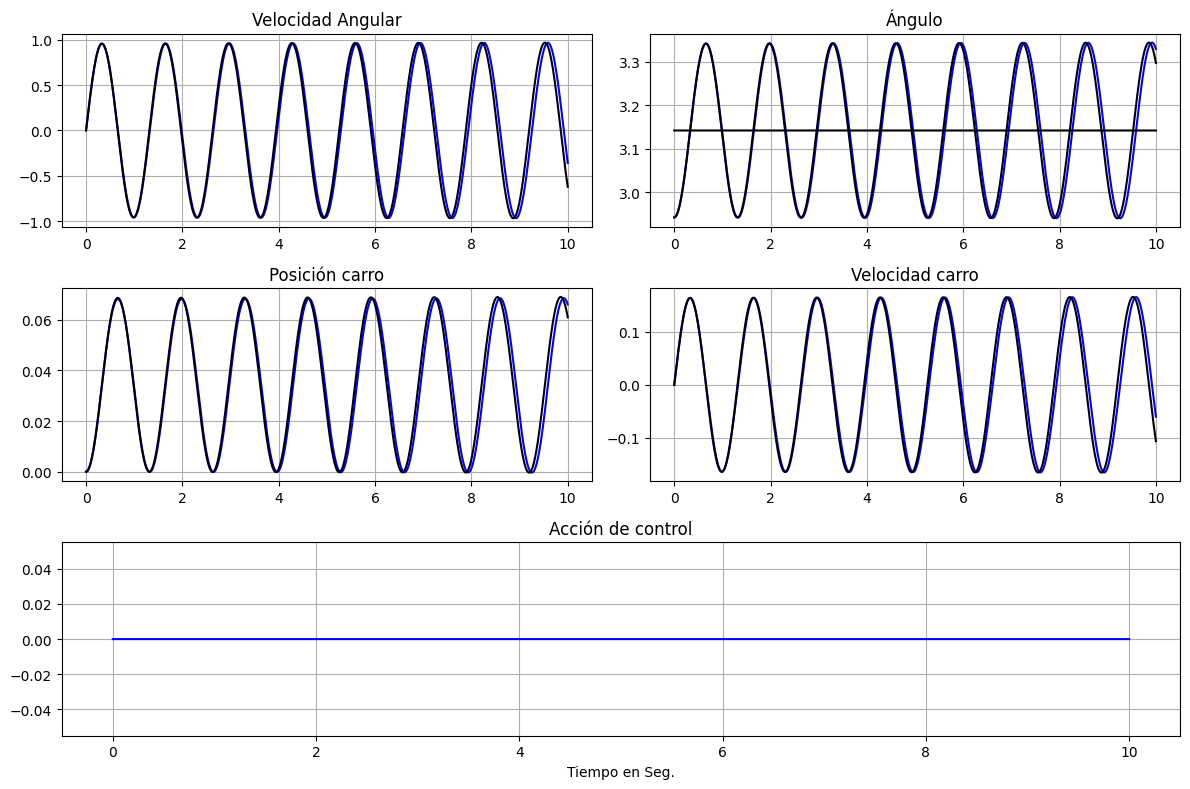

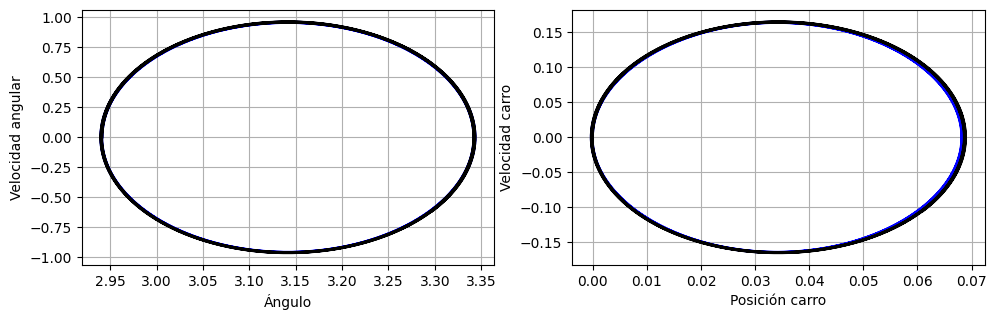

TCalculo = 6.2064878940582275 segundos


In [20]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

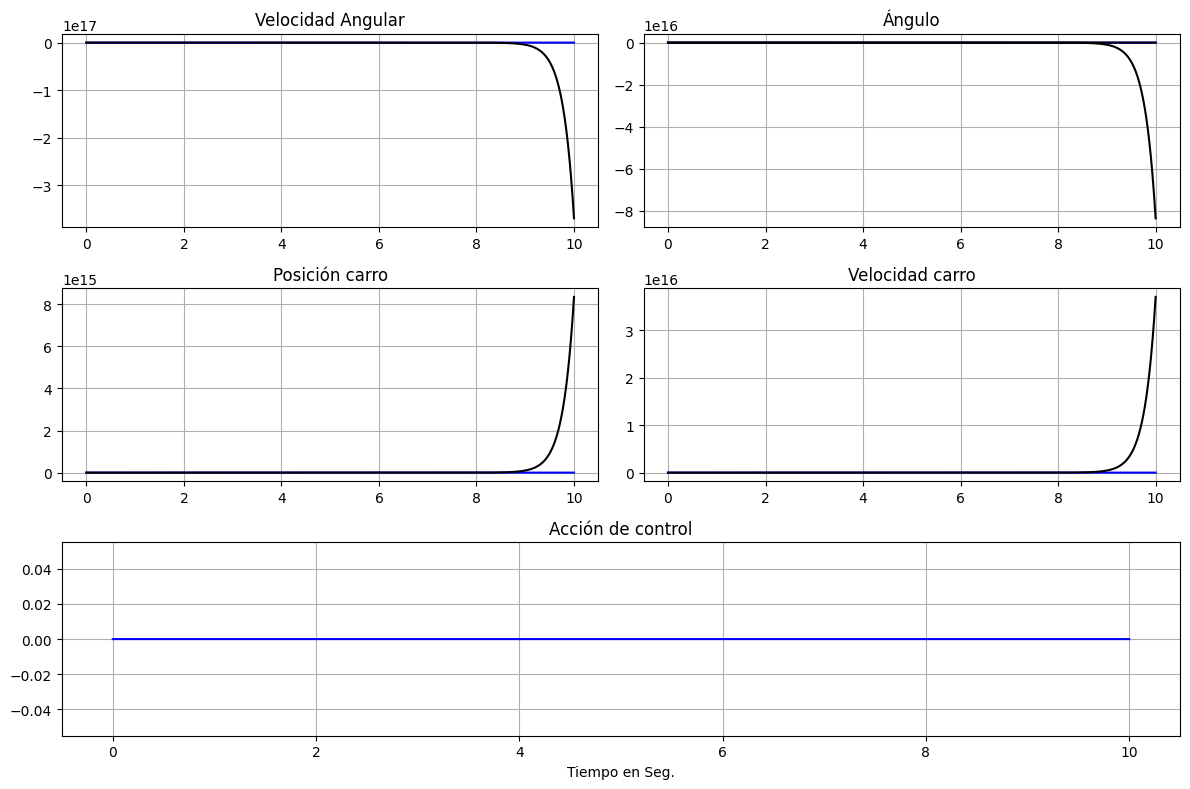

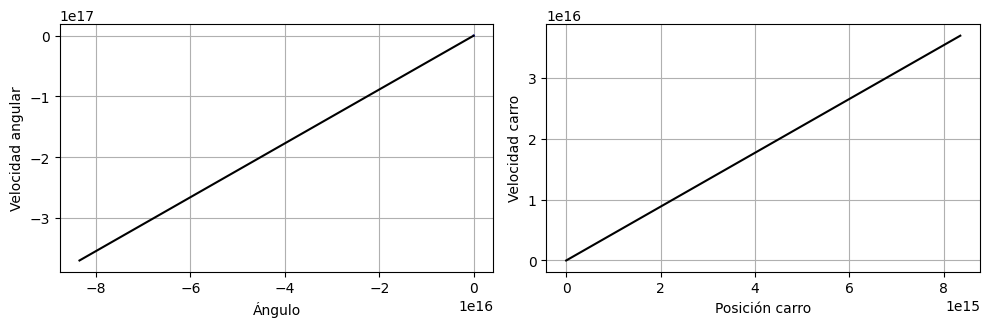

TCalculo = 6.130599498748779 segundos


In [23]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.1
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable œÜ ‚âà 0)
alfa[0] = -0.01  # peque√±o desv√≠o desde œÜ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable œÜ ‚âà 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aqu√≠)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

3-	Modificar la masa m al doble y repetir la operaci√≥n.

Para el equilibrio estable

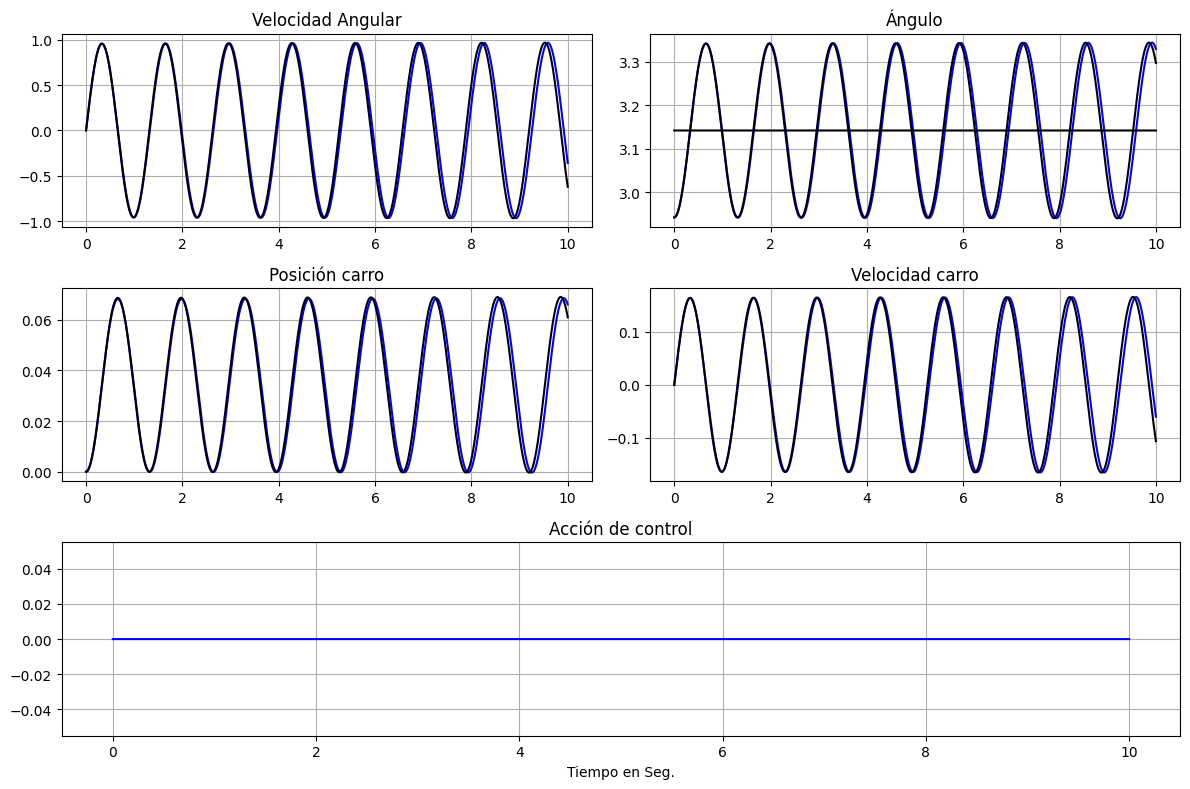

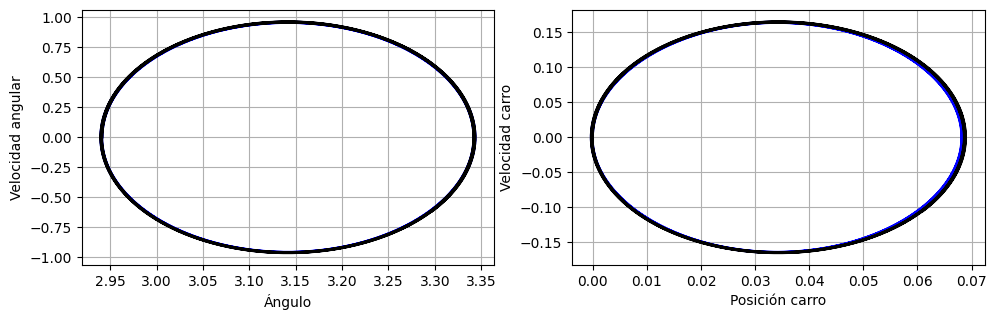

TCalculo = 7.4047956466674805 segundos


In [25]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

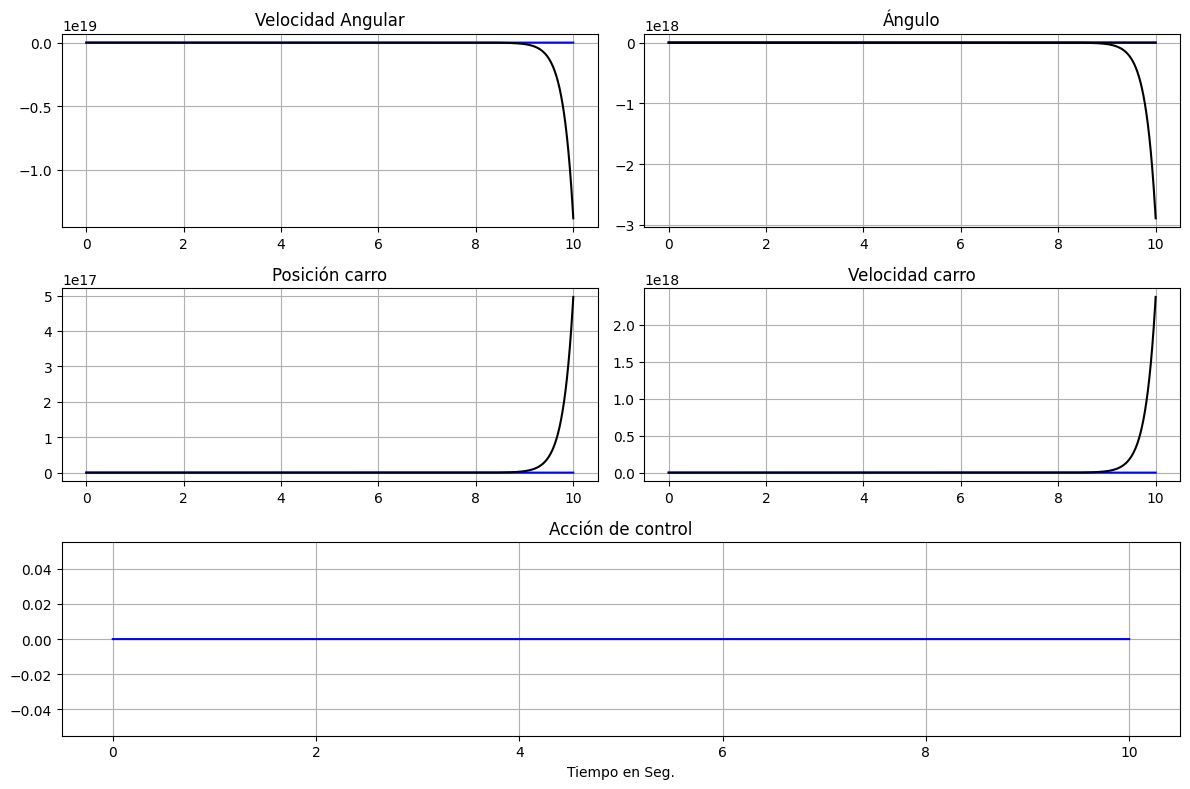

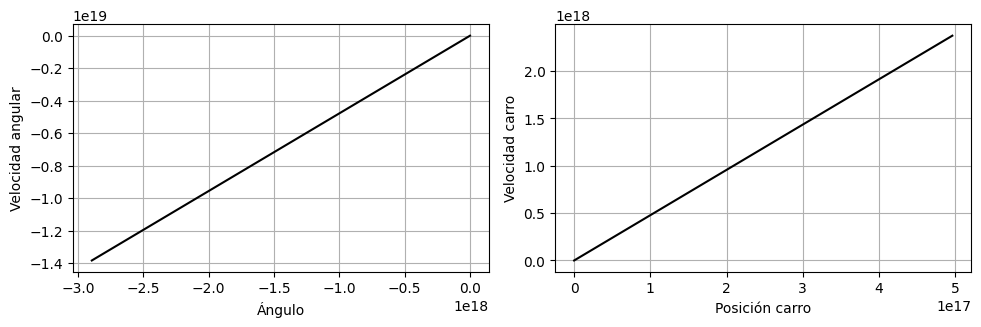

TCalculo = 6.806453704833984 segundos


In [24]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.2
Fricc = 0
long = 0.6
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable œÜ ‚âà 0)
alfa[0] = -0.01  # peque√±o desv√≠o desde œÜ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable œÜ ‚âà 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aqu√≠)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

1. Obtener la representaci√≥n lineal en variables de estado para el equilibrio estable, para lo que se sugiere obtener la versi√≥n simplificada con las funciones seno y coseno linealizadas, y luego s√≠ despejar las derivadas segundas como muestra la Fig. 1-6, donde $\ddot{\phi}$ es $\phi_{\text{pp}}$ y $\ddot{\delta}$ es $\delta_{\text{pp}}$.

El resultado se muestra en el punto 1-


5-	Obtener la soluci√≥n num√©rica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia, modificando m de 0,1 a 0,01 y la longitud l a 1,2m.


Para el equilibrio estable

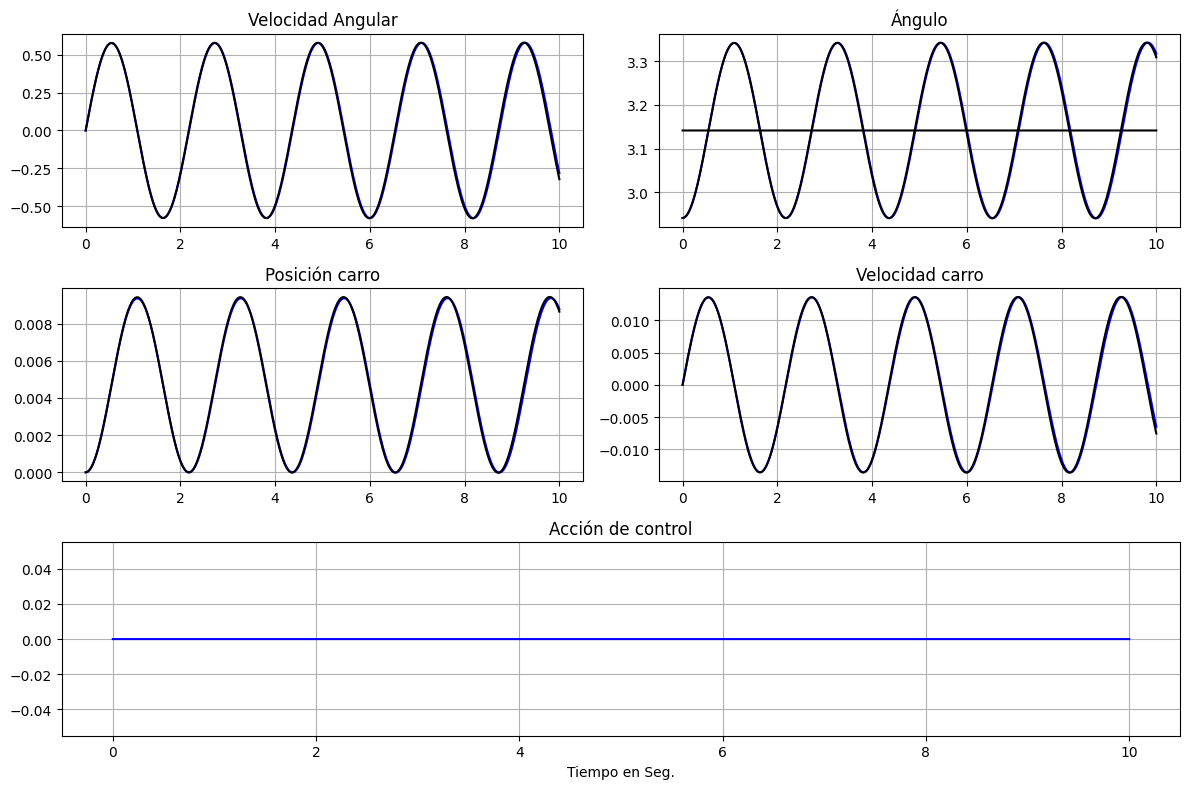

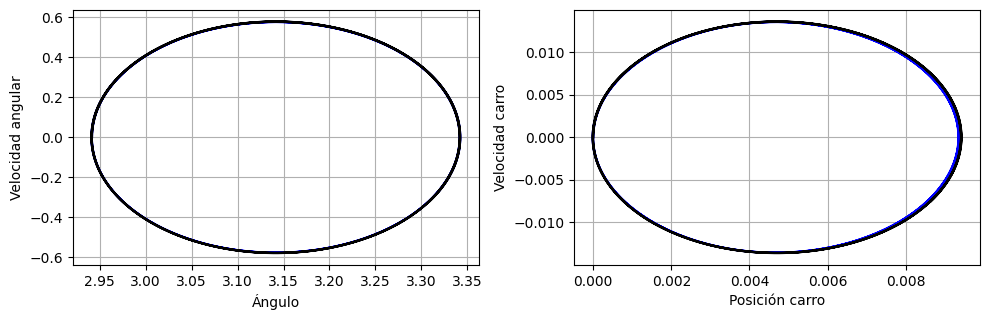

TCalculo = 6.05744481086731 segundos


In [26]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi - 0.2
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para el equilibrio inestable

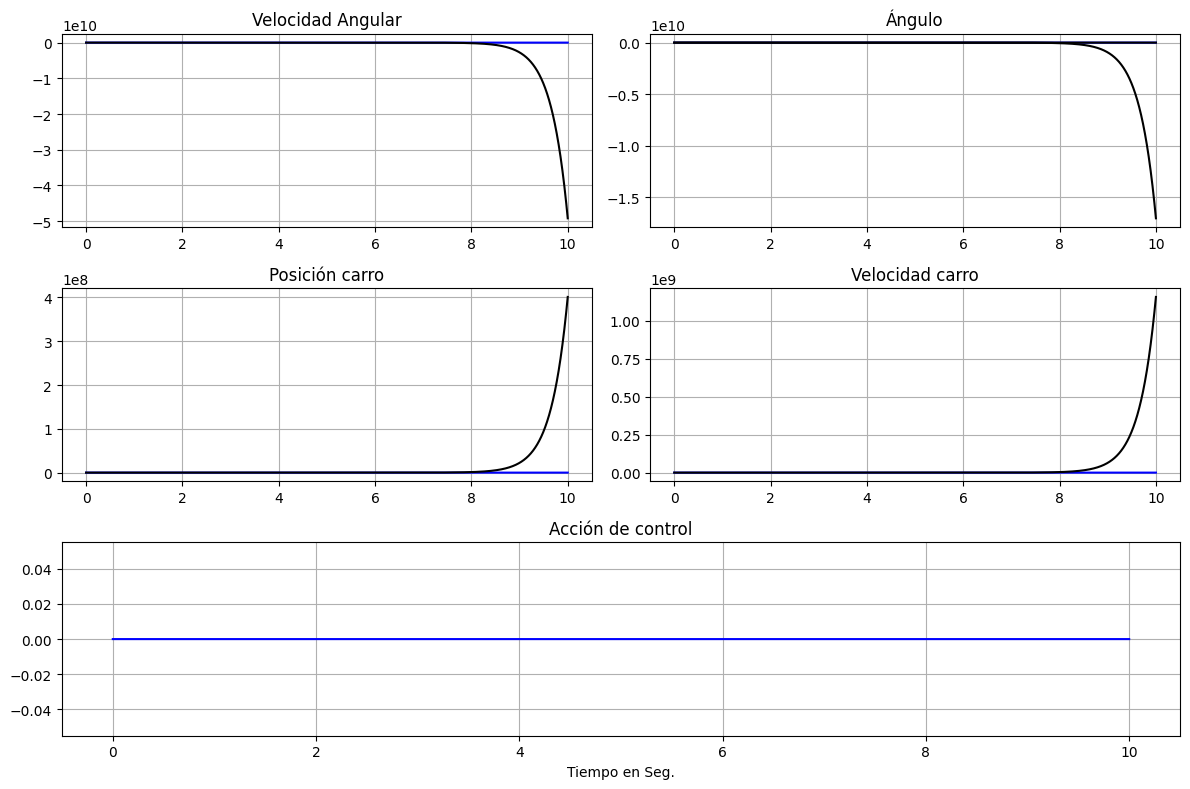

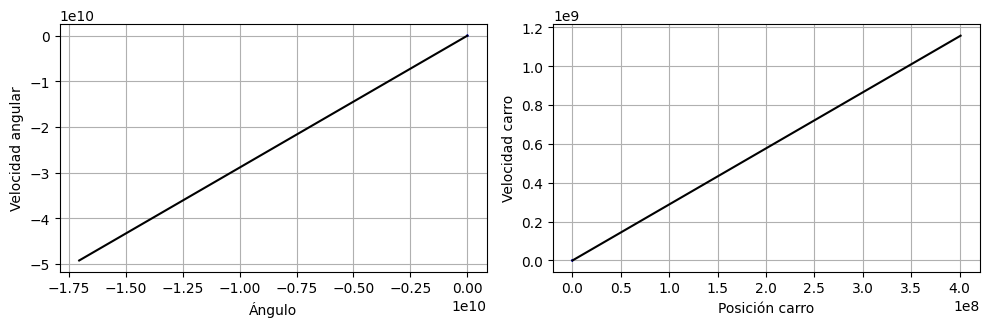

TCalculo = 6.330310106277466 segundos


In [27]:
# @title

#Simulacion para el estado inestable fi=0
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales (equilibrio inestable œÜ ‚âà 0)
alfa[0] = -0.01  # peque√±o desv√≠o desde œÜ = 0
omega[0] = 0     # velocidad angular
p[0] = 0        # posicion del carro
p_p[0] = 0      # velocidad del carro
color = 'b'

# Matrices del sistema linealizado (equilibrio inestable œÜ ‚âà 0)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, Fricc/(long*M), (M + m)*g/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

# Punto de equilibrio
X0 = np.array([0, 0, 0, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    try:
        sol = np.linalg.solve(A, b)
        p_pp_val = sol[0]
        tita_pp_val = sol[1]
    except np.linalg.LinAlgError:
        # En caso de matriz singular (poco probable aqu√≠)
        p_pp_val = 0
        tita_pp_val = 0

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.zeros_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador_VI.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

6. Obtener el sistema lineal para el equilibrio estable $x = [0 \ 0 \ \pi \ 0]^T$.

In [39]:
# @title
import sympy as sp
from IPython.display import display

# --- 1. Definir variables simb√≥licas ---
# Variables de estado
delta_sym, delta_dot_sym, phi_sym, phi_dot_sym = sp.symbols('delta delta_dot phi phi_dot')
# Entrada
u_sym = sp.symbols('u')
# Par√°metros del sistema
M_sym, m_sym, l_sym, g_sym, Fricc_sym = sp.symbols('M m l g Fricc', positive=True)

# Vector de estado simb√≥lico
x_sym = sp.Matrix([delta_sym, delta_dot_sym, phi_sym, phi_dot_sym])

# --- 2. Definir las ecuaciones no lineales de movimiento ---
# Basadas en las ecuaciones (13) de image_ef18cc.png
# Resolviendo el sistema 2x2 para las aceleraciones
# (M+m) * delta_ddot + m*l*cos(phi) * phi_ddot = u - Fricc*delta_dot + m*l*phi_dot**2*sin(phi)
# cos(phi) * delta_ddot + l * phi_ddot = g*sin(phi)

# Coeficientes de las aceleraciones en forma matricial para el sistema 2x2
coeff_matrix_sym = sp.Matrix([
    [M_sym + m_sym, m_sym * l_sym * sp.cos(phi_sym)],
    [sp.cos(phi_sym), l_sym]
])

# Vector de t√©rminos independientes
rhs_vector_sym = sp.Matrix([
    u_sym - Fricc_sym * delta_dot_sym + m_sym * l_sym * phi_dot_sym**2 * sp.sin(phi_sym),
    g_sym * sp.sin(phi_sym)
])

# Resolver para delta_ddot y phi_ddot
# sp.Matrix.inv() para la inversa de la matriz de coeficientes
# sp.simplify() para simplificar las expresiones resultantes
accelerations_sym = sp.simplify(coeff_matrix_sym.inv() * rhs_vector_sym)

delta_ddot_sym = accelerations_sym[0]
phi_ddot_sym = accelerations_sym[1]

# Vector de funciones de estado f(x, u)
f_x_u_sym = sp.Matrix([
    delta_dot_sym,
    delta_ddot_sym,
    phi_dot_sym,
    phi_ddot_sym
])

# --- 3. Definir el punto de equilibrio estable ---
# Para el p√©ndulo invertido, el equilibrio estable es phi = pi (colgando hacia abajo)
# y todas las velocidades/fuerzas son cero en el equilibrio.
# Siendo u=0 para mantener el equilibrio sin perturbaciones.
eq_point_x = {
    delta_sym: 0,
    delta_dot_sym: 0,
    phi_sym: sp.pi, # Punto de equilibrio: phi = pi
    phi_dot_sym: 0
}
eq_point_u = {u_sym: 0}

# --- 4. Calcular las matrices Jacobianas A y B ---
# Matriz A = df/dx |_(x_eq, u_eq)
A_sym_expr = f_x_u_sym.jacobian(x_sym)
A_sym = sp.simplify(A_sym_expr.subs({**eq_point_x, **eq_point_u}))

# Matriz B = df/du |_(x_eq, u_eq)
B_sym_expr = f_x_u_sym.jacobian(sp.Matrix([u_sym]))
B_sym = sp.simplify(B_sym_expr.subs({**eq_point_x, **eq_point_u}))

# --- 5. Mostrar los resultados simb√≥licos ---
print("--- Matrices A y B del sistema lineal para el Equilibrio Estable (phi = pi) ---")
print("\nMatriz A (simb√≥lica):")
display(A_sym)

print("\nMatriz B (simb√≥lica):")
display(B_sym)


--- Matrices A y B del sistema lineal para el Equilibrio Estable (phi = pi) ---

Matriz A (simb√≥lica):


‚é°0     1          0       0‚é§
‚é¢                          ‚é•
‚é¢   -Fricc      -g‚ãÖm       ‚é•
‚é¢0  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ     ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ     0‚é•
‚é¢      M          M        ‚é•
‚é¢                          ‚é•
‚é¢0     0          0       1‚é•
‚é¢                          ‚é•
‚é¢   -Fricc   -g‚ãÖ(M + m)    ‚é•
‚é¢0  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  0‚é•
‚é£     M‚ãÖl        M‚ãÖl       ‚é¶


Matriz B (simb√≥lica):


‚é° 0 ‚é§
‚é¢   ‚é•
‚é¢ 1 ‚é•
‚é¢ ‚îÄ ‚é•
‚é¢ M ‚é•
‚é¢   ‚é•
‚é¢ 0 ‚é•
‚é¢   ‚é•
‚é¢ 1 ‚é•
‚é¢‚îÄ‚îÄ‚îÄ‚é•
‚é£M‚ãÖl‚é¶

7-	Obtener la soluci√≥n num√©rica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia en el equilibrio estable modificando m de 0,1 a 0,01 y cambiar la longitud l a 1,2m.


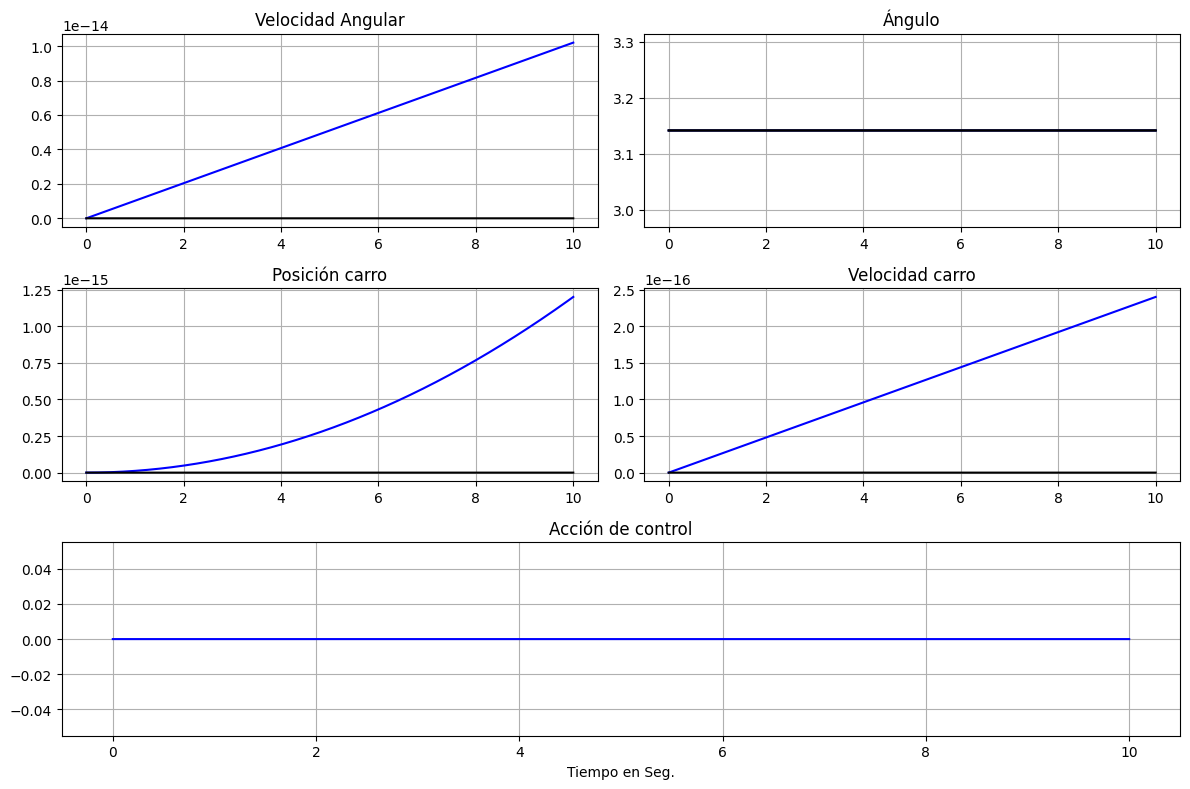

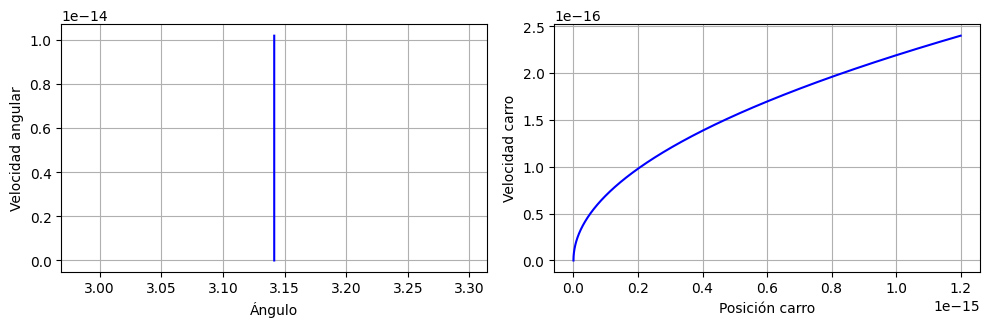

TCalculo = 5.9764180183410645 segundos


In [30]:
# @title
# Simulacion estado estable fi=pi
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io as sio

# Desactivar warnings
import warnings
warnings.filterwarnings("ignore")

start_time = time.time()

# Par√°metros
m = 0.01
Fricc = 0
long = 1.2
g = 9.8
M = 0.5
h = 0.0001
tiempo = int(10 / h)

# Inicializaci√≥n
omega = np.zeros(tiempo+1)
alfa = np.zeros(tiempo+1)
p = np.zeros(tiempo+1)
p_p = np.zeros(tiempo+1)
u = np.zeros(tiempo+1)

# Condiciones iniciales
alfa[0] = np.pi
omega[0] = 0
p[0] = 0
p_p[0] = 0
color = 'b'

# Matrices del sistema linealizado (Sontag, equilibrio estable)
Mat_A = np.array([
    [0, 1, 0, 0],
    [0, -Fricc/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -Fricc/(long*M), -g*(m+M)/(long*M), 0]
])
Mat_B = np.array([[0], [1/M], [0], [1/(long*M)]])

X0 = np.array([0, 0, np.pi, 0])
x = np.array([0, 0, alfa[0], 0])

# Inicializaci√≥n resultados del sistema lineal
pl = np.zeros(tiempo+1)
p_pl = np.zeros(tiempo+1)
alfal = np.zeros(tiempo+1)
omegal = np.zeros(tiempo+1)

# Simulaci√≥n
for i in range(tiempo):
    # No lineal
    sin_phi = np.sin(alfa[i])
    cos_phi = np.cos(alfa[i])

    # Resolver el sistema acoplado de ecuaciones
    # Matriz de coeficientes para [p_pp, tita_pp]
    A = np.array([
        [1, m*long*cos_phi/(M+m)],
        [cos_phi/long, 1]
    ])

    # Vector de t√©rminos independientes
    b = np.array([
        (u[i] + m*long*omega[i]**2*sin_phi - Fricc*p_p[i])/(M+m),
        g*sin_phi/long
    ])

    # Resolver el sistema lineal
    sol = np.linalg.solve(A, b)
    p_pp_val = sol[0]
    tita_pp_val = sol[1]

    # Euler no lineal
    p_p[i+1] = p_p[i] + h * p_pp_val
    p[i+1] = p[i] + h * p_p[i]
    omega[i+1] = omega[i] + h * tita_pp_val
    alfa[i+1] = alfa[i] + h * omega[i]

    # Guardar estado lineal
    pl[i] = x[0]
    p_pl[i] = x[1]
    alfal[i] = x[2]
    omegal[i] = x[3]

    # Sistema lineal
    xp = Mat_A @ (x - X0) + (Mat_B.flatten() * u[i])
    x = x + h * xp

# Guardar el √∫ltimo paso
pl[-1] = x[0]
p_pl[-1] = x[1]
alfal[-1] = x[2]
omegal[-1] = x[3]

# Tiempo
t = np.arange(0, tiempo+1) * h
u[-1] = 0  # √∫ltimo valor

# ---------- Gr√°ficos ----------

# Figura temporal
fig1 = plt.figure(figsize=(12, 8))
plt.subplot(3,2,1)
plt.plot(t, omega, color)
plt.plot(t, omegal, 'k')
plt.grid(True); plt.title("Velocidad Angular")

plt.subplot(3,2,2)
plt.plot(t, alfa, color)
plt.plot(t, np.pi * np.ones_like(t), 'k')
plt.plot(t, alfal, 'k')
plt.grid(True); plt.title("√Ångulo")

plt.subplot(3,2,3)
plt.plot(t, p, color)
plt.plot(t, pl, 'k')
plt.grid(True); plt.title("Posici√≥n carro")

plt.subplot(3,2,4)
plt.plot(t, p_p, color)
plt.plot(t, p_pl, 'k')
plt.grid(True); plt.title("Velocidad carro")

plt.subplot(3,1,3)
plt.plot(t, u, color)
plt.grid(True); plt.title("Acci√≥n de control")
plt.xlabel("Tiempo en Seg.")

plt.tight_layout()
plt.show()

# Figura de fases
fig2 = plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.plot(alfa, omega, color)
plt.plot(alfal, omegal, 'k')
plt.grid(True); plt.xlabel("√Ångulo"); plt.ylabel("Velocidad angular")

plt.subplot(2,2,2)
plt.plot(p, p_p, color)
plt.plot(pl, p_pl, 'k')
plt.grid(True); plt.xlabel("Posici√≥n carro"); plt.ylabel("Velocidad carro")

plt.tight_layout()
plt.show()

# Guardar variables
sio.savemat("Datos_Controlador.mat", {
    'alfa': alfa,
    'omega': omega,
    'p': p,
    'p_p': p_p,
    'u': u,
    'pl': pl,
    'p_pl': p_pl,
    'alfal': alfal,
    'omegal': omegal,
    't': t
})

# Tiempo de c√≥mputo
TCalculo = time.time() - start_time
print("TCalculo =", TCalculo, "segundos")

Para este caso se observa que las simulaciones con el metodo de Euler no coincide con la simulacion de las expresiones analiticas de la velocidad angular, la posicion y la velocidad del carro, aunque los valores obtenidos con el metodo numerico son cercanos a 0.

**Informe**

Se ha implementado el lenguaje Python para la simulacion de los sistemas dinamicos circuito RLC, vuelo de un avion y pendulo invertido.

Se han obtenido las ecuaciones analiticas y las matrices de los sistemas lineales de manera simbolica.

Se ha implementado el metodo de Euler para la simulacion de los correspondientes sistemas lineales.

Ademas se ha utilizado el entorno Colaboratory tanto para la ejecucion de los script como para incluir textos y figuras.

Se ha obtenido la version pdf de la tarea, aunque no se logra un texto ordenado.

Cabe destacar que hasta el momento las tareas realizadas me han ayudado a implementar la simulacion de operaciones de transferencia de materia en la asignatura que dicto. üòÄ

